In [1]:
from indoxGen.synthCore import TabularGANConfig,TabularGANTrainer

In [2]:
import pandas as pd
data = pd.read_csv("data/Adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [3]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [5]:
# Prepare the data first
trainer = TabularGANTrainer(config=None,
                            categorical_columns=categorical_columns,
                            mixed_columns=mixed_columns,
                            integer_columns=integer_columns)

# Transform the data and get the number of features
transformed_data = trainer.prepare_data(data)
transformed_dim = transformed_data.shape[1]

# Now, define the configuration with the correct output_dim
config = TabularGANConfig(
    input_dim=100,  # Noise dimension
    output_dim=transformed_dim,  # Set output_dim based on the transformed data
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=50,
    n_critic=5
)

# Now, initialize the trainer with the correct config
trainer.config = config

# Train the model
history = trainer.train(data, patience=10)




Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - d_loss: 0.5663 - g_loss: -0.3482
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - d_loss: 0.0028 - g_loss: -0.2623
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - d_loss: -0.0013 - g_loss: -0.3079    
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - d_loss: -0.1213 - g_loss: -0.3524
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - d_loss: -0.1605 - g_loss: -0.3671
Epoch 6/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - d_loss: -0.1941 - g_loss: -0.3678
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - d_loss: -0.2131 - g_loss: -0.3705
Epoch 8/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - d_loss: -0.2389 - g_loss: -0.3563
Epoch 9/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - d_loss: -0.2672 - g_loss: -0.3381
Epoch 10/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - d_loss: -0.2807 - g_loss: -0.3345
Epoch 11/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - d_loss: -0.2834 - g_loss: -0.3342
Epoch 12/50
3

In [30]:
# Optionally generate synthetic data
synthetic_data = trainer.generate_samples(50000)

In [31]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,35,4,111612,11,2,8,0,4,1,787,0,34,39,0
1,31,4,247464,11,4,1,0,4,1,0,36,34,39,0
2,26,6,189933,9,0,10,1,4,0,0,0,30,39,0
3,34,4,116495,11,4,12,1,4,1,0,19,41,39,0
4,26,4,205066,15,4,4,0,4,1,0,0,33,39,0


In [32]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [33]:
history = trainer.get_training_history()

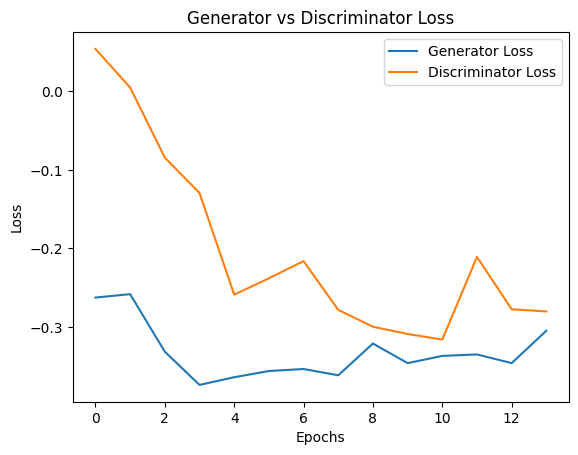

In [34]:
import matplotlib.pyplot as plt

# Extract loss history from the training process
generator_loss = history.history['g_loss']
discriminator_loss = history.history['d_loss']

# Plot the loss curves
plt.plot(generator_loss, label='Generator Loss')
plt.plot(discriminator_loss, label='Discriminator Loss')
plt.title('Generator vs Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


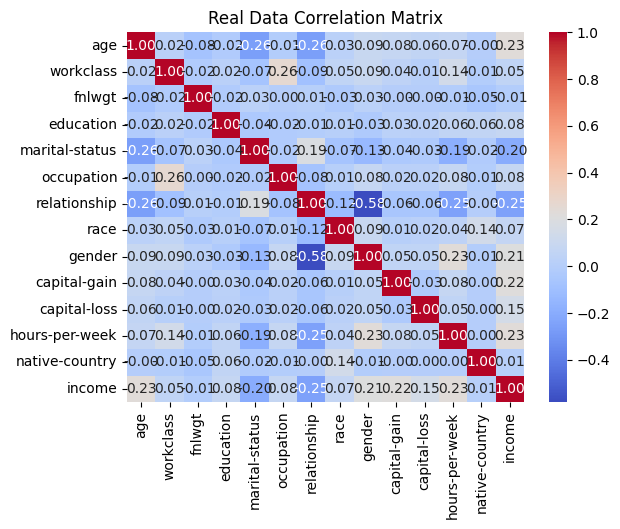

<Axes: >

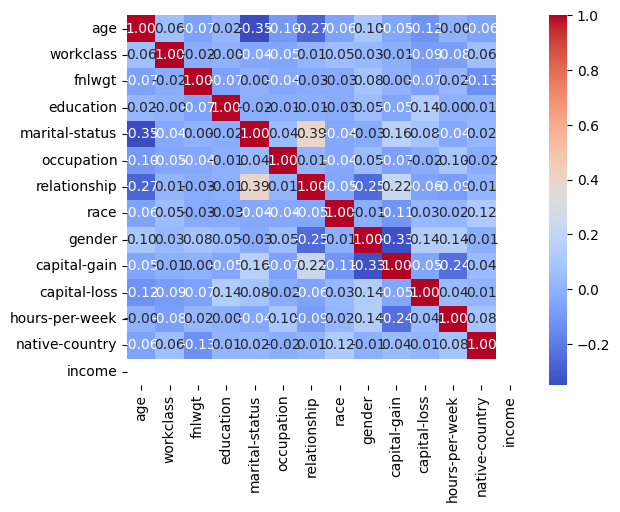

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and round correlation matrices to 2 decimal places
real_corr = data.corr().round(2)
synthetic_corr = synthetic_data.corr().round(2)

# Plot heatmap for real data
sns.heatmap(real_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2f' ensures 2 decimal places
plt.title('Real Data Correlation Matrix')
plt.show()

# Plot heatmap for synthetic data
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2


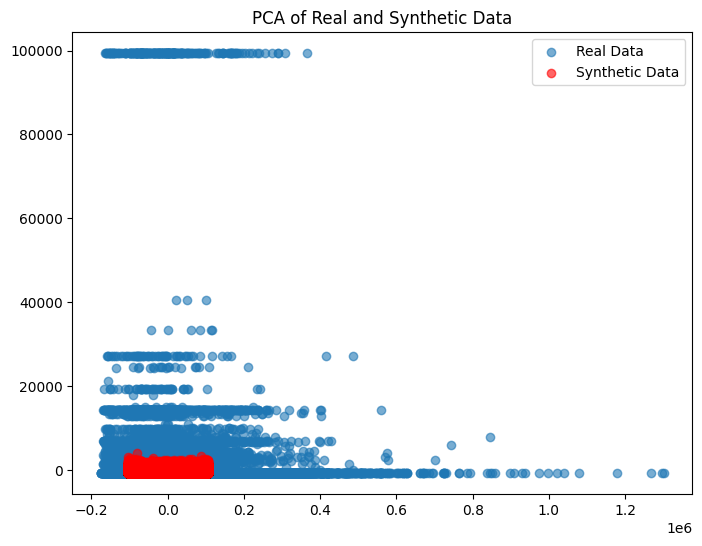

In [36]:
from sklearn.decomposition import PCA

# Combine real and synthetic data for PCA
combined_data = pd.concat([data, synthetic_data])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:len(data), 0], pca_result[:len(data), 1], label="Real Data", alpha=0.6)
plt.scatter(pca_result[len(data):, 0], pca_result[len(data):, 1], label="Synthetic Data", alpha=0.6, color='red')
plt.title('PCA of Real and Synthetic Data')
plt.legend()
plt.show()
